In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel("Data Science/AirQualityUCI.xlsx")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


Reading the Data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

Notice that the "Date" column has correct panda frame but "Time" column is given as object, which needs to be converted

In [29]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [30]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [31]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


Here,we see some invalid negative entries which are to be replaced with compatible values

In [32]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Checking total no. of rows having missing values as negative entries under all columns

In [33]:
df.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

# Using Replace function to replace all the negative missing values with null

In [34]:
df=df.replace(to_replace=-200, value= np.NaN)
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### Replacing the null values in each column with the respective mean 

In [35]:
df=df.fillna(df.mean())

In [36]:
df.tail(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9354,2005-04-04,12:00:00,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,218.811816,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,218.811816,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


# Extracting Year, Month and Hour from Date and Time Columns to see the trends 

In [37]:
df["Year"]=df.Date.astype("str").str[0:4]
df["Month"]=df.Date.astype("str").str.split("-").str[1]
df["Hour"]=df["Time"].astype("str").str[0:2]
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Hour
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,2004,03,18
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,2004,03,19


### Converting the String type entries in Year, Month and Hour into integer types and Time column from String to DateTime format of Pandas, for ease of analysis.

In [38]:
df["Year"]=df.Year.astype("int64")
df["Month"]=df.Month.astype("int64")
df["Hour"]=df["Hour"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Year           9357 n

# Combining Date and Time into one single column

In [41]:
datetime=pd.to_datetime(df["Date"].astype("str")+" "+df["Time"].astype("str")) 
print (datetime)
print("\n") 
df=df.drop(["Date","Time"], axis=1)
df["DateTime"]=datetime
X=df["DateTime"]
Y=df.drop(["DateTime","Year","Month","Hour"],axis=1)
print("X=",X)
print("\n")
print("Y=", Y)

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Length: 9357, dtype: datetime64[ns]


X= 0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]


Y=       CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6      1360.00  150.000000  11.881723        1045.50    166.0   
1        2.0      1292.25  112.000000   9.397165         954.75    103.0   
2        2.2      1402.00   88.000000   8.997817         939.25    131.0   
3   

# Splitting the Data for training and testing parts using FbProphet Model

In [42]:
from sklearn.model_selection import train_test_split
from prophet import Prophet

#Choosing the target column and splitting the dataset keeping train set 80% of original data and test set 20%.
train_size=int(len(X)*0.8)
data=pd.DataFrame()
data["ds"]=X
data["y"]= Y["RH"]
print(data)
print("\n")

m=Prophet()
train_data=data[:train_size]
test_data=data[train_size:]

print ("Length of Training Data=", len(train_data))
print("Length of Test Data=", len(test_data))

#Training the model
m.fit(train_data)

                      ds          y
0    2004-03-10 18:00:00  48.875001
1    2004-03-10 19:00:00  47.700000
2    2004-03-10 20:00:00  53.975000
3    2004-03-10 21:00:00  60.000000
4    2004-03-10 22:00:00  59.575001
...                  ...        ...
9352 2005-04-04 10:00:00  29.250000
9353 2005-04-04 11:00:00  23.725000
9354 2005-04-04 12:00:00  18.350000
9355 2005-04-04 13:00:00  13.550000
9356 2005-04-04 14:00:00  13.125000

[9357 rows x 2 columns]


Length of Training Data= 7485
Length of Test Data= 1872


15:54:56 - cmdstanpy - INFO - Chain [1] start processing
15:54:59 - cmdstanpy - INFO - Chain [1] done processing


# Making Predictions on Test Set

In [46]:
y_pred=m.predict(test_data[["ds"]])
y_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-16 15:00:00,58.630101,31.809159,61.617835,58.630101,58.630101,-12.682899,-12.682899,-12.682899,-12.480609,-12.480609,-12.480609,-0.202290,-0.202290,-0.202290,0.0,0.0,0.0,45.947202
1,2005-01-16 16:00:00,58.629295,32.139958,59.721542,58.629295,58.629295,-12.335037,-12.335037,-12.335037,-12.115300,-12.115300,-12.115300,-0.219737,-0.219737,-0.219737,0.0,0.0,0.0,46.294259
2,2005-01-16 17:00:00,58.628489,32.572660,62.266134,58.628489,58.628489,-10.905187,-10.905187,-10.905187,-10.663045,-10.663045,-10.663045,-0.242142,-0.242142,-0.242142,0.0,0.0,0.0,47.723302
3,2005-01-16 18:00:00,58.627683,35.904528,66.053530,58.627683,58.627683,-8.198460,-8.198460,-8.198460,-7.928983,-7.928983,-7.928983,-0.269477,-0.269477,-0.269477,0.0,0.0,0.0,50.429223
4,2005-01-16 19:00:00,58.626877,39.027495,68.584196,58.626877,58.626877,-4.780713,-4.780713,-4.780713,-4.479065,-4.479065,-4.479065,-0.301648,-0.301648,-0.301648,0.0,0.0,0.0,53.846164


# Evaluating the Model

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

prophet_test_mae=mean_absolute_error(test_data["y"], y_pred["yhat"])
prophet_test_rmse=np.sqrt(mean_squared_error(test_data["y"],y_pred["yhat"]))
prophet_test_r2=r2_score(test_data["y"], y_pred["yhat"])

results=pd.DataFrame(["FB Prophet", prophet_test_mae, prophet_test_mse, prophet_test_r2]).transpose()
results.columns=["Model", "Mean Absolute Error", "Root Mean Square Error", "R-Squared Error"]
results

,Model,Mean Absolute Error,Root Mean Square Error,R-Squared Error
0,FB Prophet,13.093777,15.692494,0.05408


In [51]:
tar_mean=df["RH"].mean()
tar_mean

49.23236014505123

Seeing the target mean and the metrics, it's clear that the performance of the model is poor. The R2 score shows that the trained model can only explan 5.4% variance of the data. The reason may be the Target Column- Relative Humidity or RH depends on Temperature and Pressure too.

# Comparing Forecast to Actual values

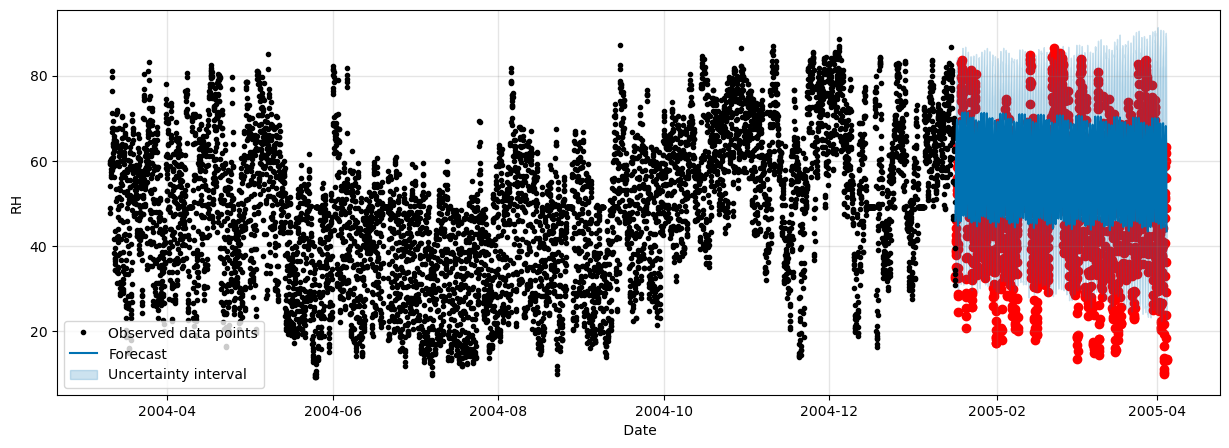

In [69]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(x=test_data["ds"],y=test_data["y"],color="red")
fig=m.plot(y_pred,ax=ax)
plt.xlabel(" Date")
plt.ylabel("RH")
plt.legend()
plt.show()

## Taking the higlighted portion only

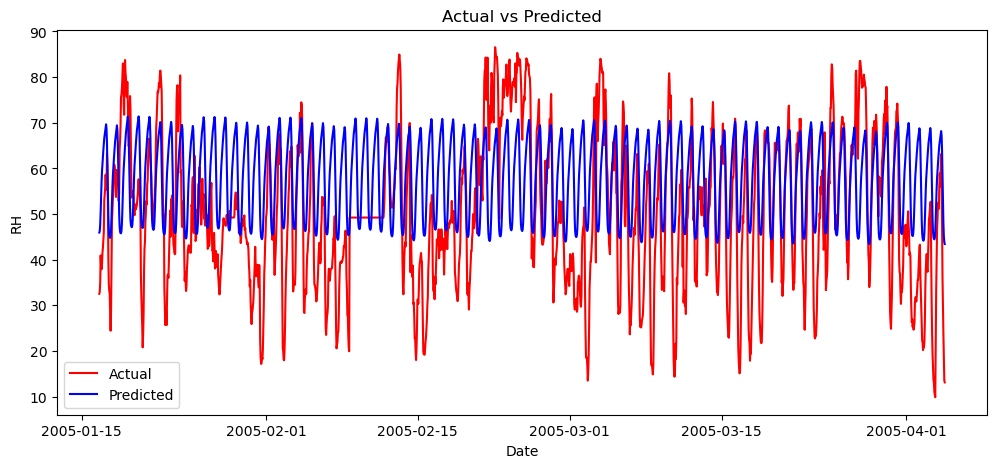

In [72]:
plt.figure(figsize=(12,5))
plt.plot(test_data["ds"], test_data["y"], label="Actual", color="red")
plt.plot(test_data["ds"],y_pred["yhat"], label="Predicted", color="blue")
plt.title("Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("RH")
plt.legend()
plt.show()

# Plotting Components from the predicted  values

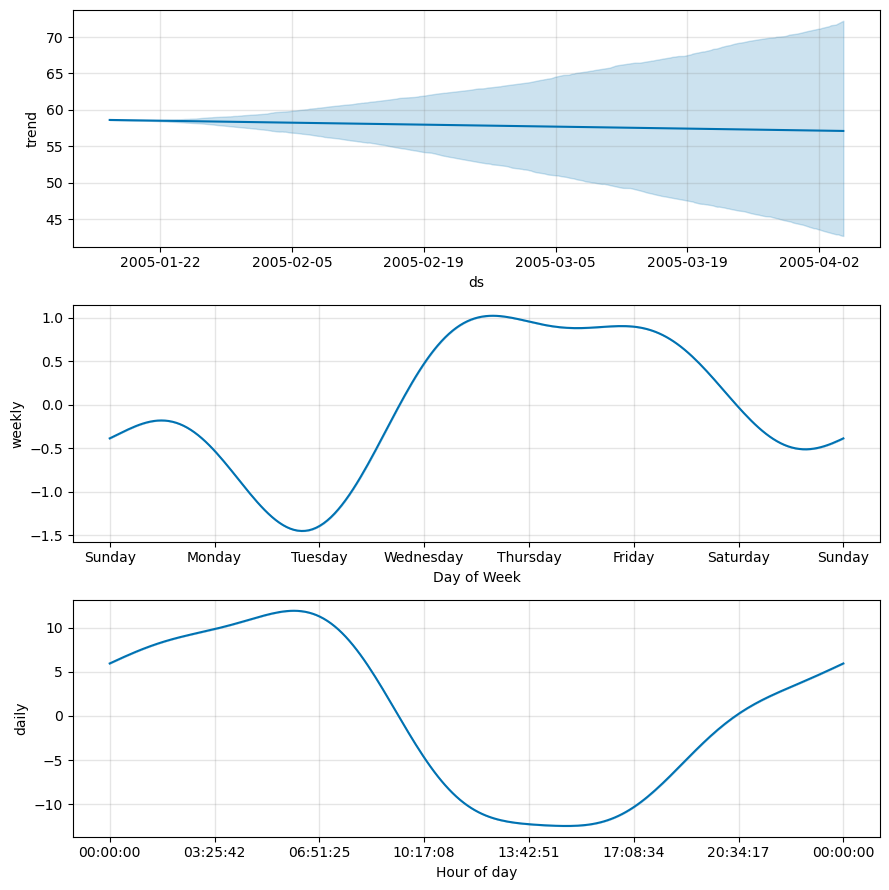

In [122]:
fig=m.plot_components(y_pred)
plt.show()

# Make Future Predictions for next 30 days

## Training the model on the entire dataset and making a future dataframe

In [57]:
final_model=Prophet()
final_model.fit(data)

#Future Dataframe
future=final_model.make_future_dataframe(periods=30, freq="H")
forecast_30days=final_model.predict(future)
last_date=data["ds"].max()
print(last_date)

17:05:51 - cmdstanpy - INFO - Chain [1] start processing
17:05:52 - cmdstanpy - INFO - Chain [1] done processing


2005-04-04 14:00:00


## Storing Forecast of 30 days in a separate dataframe

In [58]:
future_pred=forecast_30days[forecast_30days["ds"]>last_date]
future_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9357,2005-04-04 15:00:00,47.797353,17.804750,49.269541,47.797353,47.797353,-14.454676,-14.454676,-14.454676,-12.671914,-12.671914,-12.671914,-1.782761,-1.782761,-1.782761,0.0,0.0,0.0,33.342678
9358,2005-04-04 16:00:00,47.793618,17.692442,48.583082,47.793618,47.793618,-14.110594,-14.110594,-14.110594,-12.297414,-12.297414,-12.297414,-1.813180,-1.813180,-1.813180,0.0,0.0,0.0,33.683024
9359,2005-04-04 17:00:00,47.789883,19.273306,51.320849,47.789883,47.789883,-12.603741,-12.603741,-12.603741,-10.769213,-10.769213,-10.769213,-1.834529,-1.834529,-1.834529,0.0,0.0,0.0,35.186141
9360,2005-04-04 18:00:00,47.786147,22.574994,52.963582,47.786147,47.786147,-9.820732,-9.820732,-9.820732,-7.974264,-7.974264,-7.974264,-1.846468,-1.846468,-1.846468,0.0,0.0,0.0,37.965416
9361,2005-04-04 19:00:00,47.782412,26.288967,56.280923,47.782412,47.782412,-6.365295,-6.365295,-6.365295,-4.516549,-4.516549,-4.516549,-1.848746,-1.848746,-1.848746,0.0,0.0,0.0,41.417117


# Visualization of Forecast and Observed Values

<Figure size 1200x500 with 0 Axes>

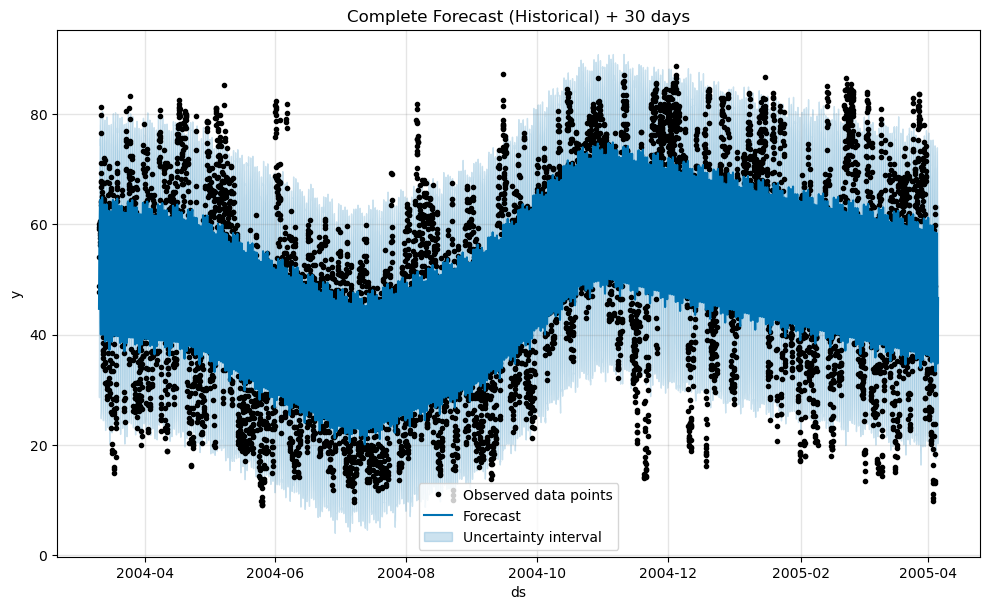

In [62]:
plt.figure(figsize=(12,5))
final_model.plot(forecast_30days)
plt.title("Complete Forecast (Historical) + 30 days")
plt.legend()
plt.show()

## Visualization of next 30 days only

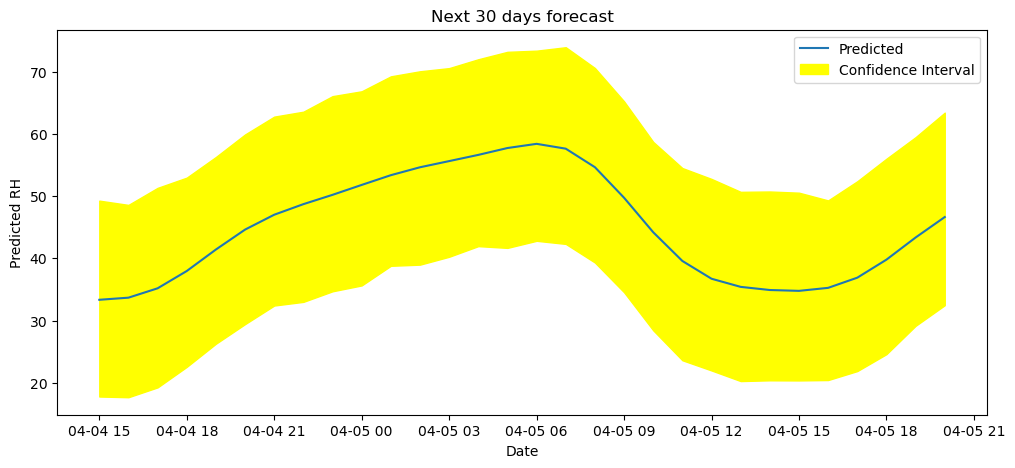

In [68]:
plt.figure(figsize=(12,5))
plt.plot(future_pred["ds"],future_pred["yhat"], label="Predicted")
plt.fill_between(future_pred["ds"],future_pred["yhat_lower"],
                 future_pred["yhat_upper"], label="Confidence Interval", color="yellow")
plt.title("Next 30 days forecast")
plt.xlabel("Date")
plt.ylabel("Predicted RH")
plt.legend()
plt.show()

## Future Extensions 

Using LSTM model might help improve R2 score and the subsequent model performance. I'll explore the Time Series forecating more and try to take better approach comparing different models. 